In [58]:
import zipfile
import io

zip_file_path = '/content/archive.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_data')

In [59]:
import os

extracted_dir = '/content/extracted_data'
extracted_files = os.listdir(extracted_dir)
print(extracted_files)

['OR Fuzzy.xlsx', 'XOR Fuzzy.xlsx', 'AND Fuzzy.xlsx', 'NOT Fuzzy.xlsx', 'Implication Fuzzy.xlsx']


In [60]:
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pandas as pd

and_op = pd.read_excel('/content/extracted_data/AND Fuzzy.xlsx')
or_op = pd.read_excel('/content/extracted_data/OR Fuzzy.xlsx')
implication_op = pd.read_excel('/content/extracted_data/Implication Fuzzy.xlsx')
not_op = pd.read_excel('/content/extracted_data/NOT Fuzzy.xlsx')
xor = pd.read_excel('/content/extracted_data/XOR Fuzzy.xlsx')

and_op = and_op.drop(columns=['Unnamed: 0'])
or_op = or_op.drop(columns=['Unnamed: 0'])
implication_op = implication_op.drop(columns=['Unnamed: 0'])
not_op = not_op.drop(columns=['Unnamed: 0'])
xor = xor.drop(columns=['Unnamed: 0'])

In [61]:
and_op.sample(5)

,X1,X2,Target
668,0.168690,0.632540,0
549,0.198367,0.697489,0
216,0.975857,0.502692,1
790,0.165941,0.791919,0
591,0.731150,0.889041,1


In [62]:
and_op.shape,or_op.shape,xor.shape,implication_op.shape

((1000, 3), (1000, 3), (1000, 3), (1000, 3))

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

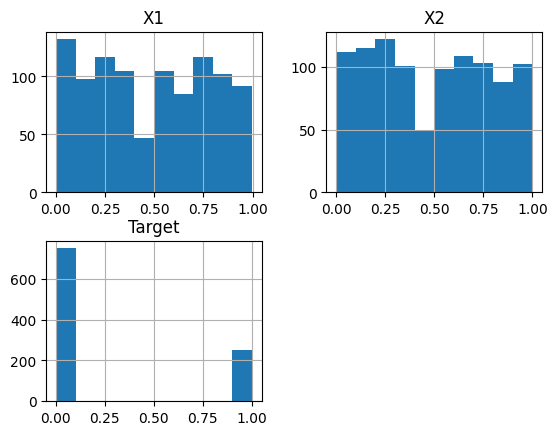

In [63]:
and_op.hist()

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

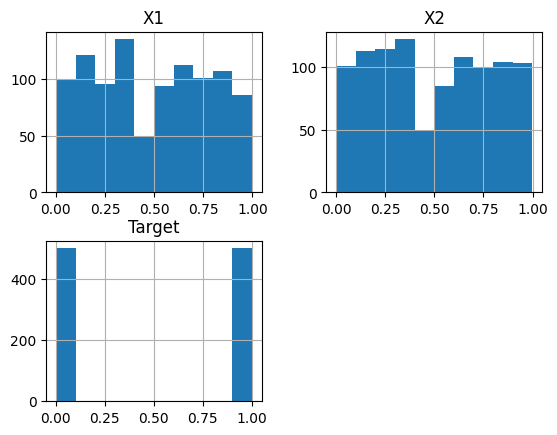

In [64]:
xor.hist()

array([[<Axes: title={'center': 'X1'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

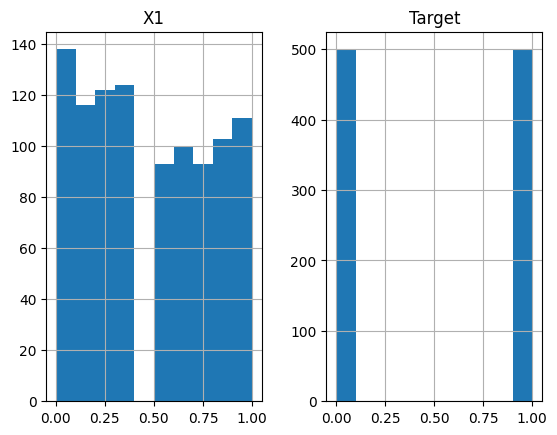

In [65]:
not_op.hist()

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

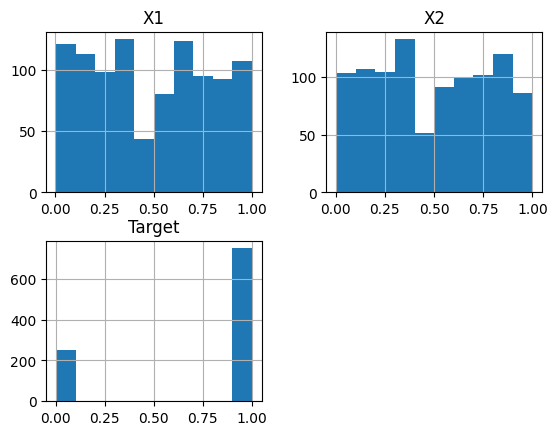

In [66]:
or_op.hist()

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

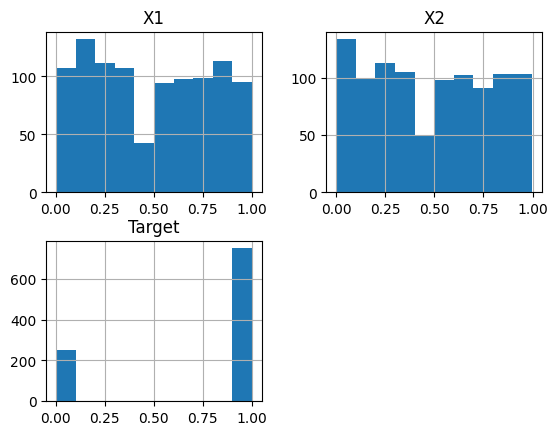

In [67]:
implication_op.hist()

In [68]:
x_and_op = and_op[['X1','X2']]
y_and_op = and_op['Target']

x_or_op = or_op[['X1','X2']]
y_or_op = or_op['Target']

x_not_op = not_op['X1']
y_not_op = not_op['Target']

x_implication_op = implication_op[['X1','X2']]
y_implication_op = implication_op['Target']


x_xor = xor[['X1','X2']]
y_xor = xor['Target']

In [69]:
from sklearn.neural_network import MLPClassifier
model_and_op = MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 2), max_iter=10000,solver='lbfgs')

model_and_op.fit(x_and_op,y_and_op)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 2), max_iter=10000,
              solver='lbfgs')

In [70]:
 model_or_op = MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8), max_iter=10000,solver='lbfgs',verbose=True)

 model_or_op.fit(x_or_op,y_or_op)

MLPClassifier(activation='logistic', hidden_layer_sizes=(8, 8), max_iter=10000,
              solver='lbfgs', verbose=True)

In [71]:
model_implication_op = MLPClassifier(activation='tanh', hidden_layer_sizes=(4,2 ), max_iter=10000,solver='lbfgs')

model_implication_op.fit(x_implication_op,y_implication_op)

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 2), max_iter=10000,
              solver='lbfgs')

In [72]:
model_not_op = MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 4), max_iter=10000,solver='lbfgs')

model_not_op.fit(x_not_op.to_frame(),y_not_op)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 4), max_iter=10000,
              solver='lbfgs')

In [73]:
model_xor = MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8, 8), max_iter=10000)
model_xor.fit(x_xor,y_xor)

MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8, 8), max_iter=10000)

In [74]:
import pickle as pkl

with open('ORClassifier.sav','wb') as f:
  pkl.dump(model_and_op,f)
with open('and_opClassifier.sav','wb') as f:
  pkl.dump(model_or_op,f)
with open('NOTClassifier.sav','wb') as f:
  pkl.dump(model_not_op,f)
with open('IFClassifier.sav','wb') as f:
  pkl.dump(model_implication_op,f)

with open('ICFlassifier.sav','wb') as f:
  pkl.dump(model_implication_op,f)

In [75]:
with open('xorClassifier.sav','wb') as f:
  pkl.dump(model_xor,f)

In [76]:
model_and_op.predict([[0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0])

In [77]:
model_or_op.predict([[0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [78]:
model_implication_op.predict([[1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0])

In [102]:
import warnings
import pickle as pkl
import numpy as np

warnings.filterwarnings("ignore", category=UserWarning)

with open('and_opClassifier.sav', 'rb') as f:
    model_and_op = pkl.load(f)

with open('ORClassifier.sav', 'rb') as f:
    model_or_op = pkl.load(f)

with open('NOTClassifier.sav', 'rb') as f:
    model_not_op = pkl.load(f)

with open('IFClassifier.sav', 'rb') as f:
    model_implication_op = pkl.load(f)

with open('xorClassifier.sav', 'rb') as f:
    model_xor = pkl.load(f)

input_values = np.array([0.02341,0.54982]).reshape(1, -1)

and_result = model_and_op.predict(input_values)
or_result = model_or_op.predict(input_values)
not_result = model_not_op.predict(input_values[:, :1])
implication_result = model_implication_op.predict(input_values)
xor_result = model_xor.predict(input_values)

print("Fuzzy AND Result:", and_result[0])
print("Fuzzy OR Result:", or_result[0])
print("Fuzzy NOT Result:", not_result[0])
print("Fuzzy Implication Result:", implication_result[0])
print("Fuzzy XOR Result:", xor_result[0])

Fuzzy AND Result: 1
Fuzzy OR Result: 0
Fuzzy NOT Result: 1
Fuzzy Implication Result: 1
Fuzzy XOR Result: 1
